In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('C:\\Users\\gabri\\Documents\\MESTRADO_OBITO_FETAL_COVID\\dados_sim_dofet_select.csv',sep=';')
# Selecionar def_obito_parto
# Anos de interesse
df = df[df['ano_obito'].isin([2019, 2020])]
df = df.reset_index(drop=True)
df['ano_obito'] = [str(i) for i in df['ano_obito']]
df['TIPOBITO'] = [str(i) for i in df['TIPOBITO']]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIPOBITO       58098 non-null  object 
 1   ocor_MUNNOMEX  58098 non-null  object 
 2   ocor_CAPITAL   58098 non-null  object 
 3   ocor_SIGLA_UF  58098 non-null  object 
 4   ocor_REGIAO    58098 non-null  object 
 5   IDADEMAE       54153 non-null  float64
 6   def_escol_mae  58098 non-null  object 
 7   def_raca_cor   58098 non-null  object 
 8   def_sexo       58098 non-null  object 
 9   PESO           54545 non-null  float64
 10  def_parto      58098 non-null  object 
 11  def_gravidez   58098 non-null  object 
 12  def_gestacao   58098 non-null  object 
 13  data_obito     58098 non-null  object 
 14  ano_obito      58098 non-null  object 
dtypes: float64(2), object(13)
memory usage: 6.6+ MB


In [83]:
def data_quality(dataset, chave=None):
    # 1. Tipos de Variáveis
    tipos_variaveis = dataset.dtypes

    # 2. Frequência das Variáveis Categóricas
    #frequencia_categoricas = dataset.select_dtypes(include='object').apply(pd.Series.value_counts)

    # 3. Valores Discrepantes (Numéricas)
    def detectar_outliers(col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = col[(col < lower_bound) | (col > upper_bound)]
        return outliers

    outliers_numericos = dataset.select_dtypes(include=np.number).apply(detectar_outliers)

    # 4. Estatísticas básicas para variáveis numéricas
    estatisticas_numericas = dataset.describe()

    # 5. Pontos Faltantes
    porcentagem_faltantes = dataset.isnull().mean() * 100

    # 6. Dados Duplicados
    if chave is not None:
        duplicados = dataset.duplicated(subset=chave).sum()
    else:
        duplicados = dataset.duplicated().sum()

    # Armazenar os resultados em um dicionário
    resultados = {
        "tipos_variaveis": tipos_variaveis,
        #"frequencia_categoricas": frequencia_categoricas,
        "outliers_numericos": outliers_numericos,
        "estatisticas_numericas": estatisticas_numericas,
        "porcentagem_faltantes": porcentagem_faltantes,
        "duplicados": duplicados
    }

    return resultados

# Exemplo de uso da função:
# Supondo que 'dataset' seja o seu DataFrame
# Para procurar duplicados por uma chave específica, como por exemplo 'ID':
# result = data_quality(dataset, chave='ID')
# Para procurar duplicados pela linha inteira:
# result = data_quality(dataset)
# print(result)

In [84]:
aa=data_quality(dataset=df, chave=None)

In [85]:
# Dados Duplicados
duplicados = aa["duplicados"]

print(f"""
Como não temos uma variavel identificadora esses valores podem ser reais, tendo em vista a baixa quantidade {round(duplicados/len(df),5)*100} % da base
, não será excluído.

""")


Como não temos uma variavel identificadora esses valores podem ser reais, tendo em vista a baixa quantidade 0.164 % da base
, não será excluído.




In [138]:
# Estatisticas das variaveis nu méricas
aa[ "estatisticas_numericas"]
# Remover peso zero
# Ou Input 
# Remover Idade acima de X
# Fazer um corte aproximadamente 6 desvios da média 

,IDADEMAE,PESO
count,54153.000000,54545.000000
mean,27.716193,1700.283894
std,7.851411,1091.831278
min,10.000000,0.000000
25%,22.000000,738.000000
50%,27.000000,1491.000000
75%,33.000000,2500.000000
max,99.000000,6770.000000


In [87]:
# Outliers
bb=aa["outliers_numericos"]
bb[~pd.isna(bb['IDADEMAE'])]

,IDADEMAE,PESO
1407,99.0,NaN
1408,99.0,NaN
2877,99.0,NaN
3349,52.0,NaN
3671,99.0,NaN
...,...,...
54467,99.0,NaN
55880,99.0,NaN
56399,50.0,NaN
57802,99.0,NaN


In [88]:
aa["porcentagem_faltantes"]
# Remover  pontos faltantes de idade e peso
# Utilizar o dado 'cru' e depois limpo na descritiva apontando as diferenças.

TIPOBITO         0.000000
ocor_MUNNOMEX    0.000000
ocor_CAPITAL     0.000000
ocor_SIGLA_UF    0.000000
ocor_REGIAO      0.000000
IDADEMAE         6.790251
def_escol_mae    0.000000
def_raca_cor     0.000000
def_sexo         0.000000
PESO             6.115529
def_parto        0.000000
def_gravidez     0.000000
def_gestacao     0.000000
data_obito       0.000000
ano_obito        0.000000
dtype: float64

In [89]:
df[df['IDADEMAE'].isna()]

,TIPOBITO,ocor_MUNNOMEX,ocor_CAPITAL,ocor_SIGLA_UF,ocor_REGIAO,IDADEMAE,def_escol_mae,def_raca_cor,def_sexo,PESO,def_parto,def_gravidez,def_gestacao,data_obito,ano_obito
2,1,LORENA,N,SP,Sudeste,NaN,Ignorado,Ignorado,Ignorado,705.0,Vaginal,Única,22 a 27 semanas,2019-01-29,2019
9,1,CURRALINHO,N,PA,Norte,NaN,Ignorado,Ignorado,Masculino,3492.0,Vaginal,Única,Ignorado,2019-02-26,2019
33,1,CACHOEIRO DE ITAPEMIRIM,N,ES,Sudeste,NaN,Ignorado,Ignorado,Masculino,NaN,Ignorado,Ignorado,Ignorado,2019-01-20,2019
92,1,SAO JOSE DOS CAMPOS,N,SP,Sudeste,NaN,Ignorado,Ignorado,Masculino,3275.0,Vaginal,Única,37 a 41 semanas,2019-03-15,2019
97,1,CAETITE,N,BA,Nordeste,NaN,Ignorado,Ignorado,Feminino,NaN,Vaginal,Única,37 a 41 semanas,2019-01-29,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58012,1,BIRIGUI,N,SP,Sudeste,NaN,Ignorado,Ignorado,Masculino,NaN,Ignorado,Ignorado,Ignorado,2020-12-31,2020
58033,1,MAGE,N,RJ,Sudeste,NaN,Ignorado,Ignorado,Masculino,2695.0,Vaginal,Única,Ignorado,2020-12-31,2020
58034,1,DRACENA,N,SP,Sudeste,NaN,Ignorado,Ignorado,Feminino,NaN,Cesáreo,Única,37 a 41 semanas,2020-12-31,2020
58044,1,CARUARU,N,PE,Nordeste,NaN,Ignorado,Ignorado,Masculino,NaN,Ignorado,Ignorado,Ignorado,2020-12-31,2020


In [90]:
df[df['PESO'].isna()]

,TIPOBITO,ocor_MUNNOMEX,ocor_CAPITAL,ocor_SIGLA_UF,ocor_REGIAO,IDADEMAE,def_escol_mae,def_raca_cor,def_sexo,PESO,def_parto,def_gravidez,def_gestacao,data_obito,ano_obito
19,1,SAO JOSE DOS PINHAIS,N,PR,Sul,21.0,8 a 11 anos,Ignorado,Masculino,NaN,Cesáreo,Única,32 a 36 semanas,2019-02-12,2019
32,1,CACHOEIRO DE ITAPEMIRIM,N,ES,Sudeste,19.0,Ignorado,Ignorado,Feminino,NaN,Vaginal,Única,22 a 27 semanas,2019-01-17,2019
33,1,CACHOEIRO DE ITAPEMIRIM,N,ES,Sudeste,NaN,Ignorado,Ignorado,Masculino,NaN,Ignorado,Ignorado,Ignorado,2019-01-20,2019
83,1,BRASILIA,S,DF,Centro-Oeste,19.0,8 a 11 anos,Ignorado,Feminino,NaN,Ignorado,Única,32 a 36 semanas,2019-05-05,2019
97,1,CAETITE,N,BA,Nordeste,NaN,Ignorado,Ignorado,Feminino,NaN,Vaginal,Única,37 a 41 semanas,2019-01-29,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,1,CARUARU,N,PE,Nordeste,NaN,Ignorado,Ignorado,Masculino,NaN,Ignorado,Ignorado,Ignorado,2020-12-31,2020
58050,1,CESARIO LANGE,N,SP,Sudeste,35.0,1 a 3 anos,Ignorado,Feminino,NaN,Vaginal,Única,Menos de 22 semanas,2020-12-31,2020
58058,1,CONTAGEM,N,MG,Sudeste,99.0,Ignorado,Ignorado,Ignorado,NaN,Ignorado,Ignorado,Ignorado,2020-12-31,2020
58092,1,EIRUNEPE,N,AM,Norte,25.0,Nenhuma,Indígena,Ignorado,NaN,Vaginal,Única,32 a 36 semanas,2020-03-23,2020


In [131]:
# Verificar contagem de valores únicos e valores ausentes para cada variável categórica
for col in df.select_dtypes(include=['object']):
    print(f'\nContagem de valores únicos para {col}:')
    print(df[col].value_counts())
    print(f'\nValores ausentes para {col}: {df[col].isnull().sum()}')

# Região pode ser um caminho.
# Olhar os bancos de nascimentos para verificar municípios com poucos partos/mês.
# Ignorado Descartar

# Categorizar PESO (Pequeno, adequado e (Gig 1 e 2(Macrossômico))) Função padrão, lembrar de pedir!
# Variavel X combinado da iadade gestacional com o peso (Gig 1 e 2(Macrossômico))
# Manter o PESO em variável absoluta.



Contagem de valores únicos para TIPOBITO:
1    58020
Name: TIPOBITO, dtype: int64

Valores ausentes para TIPOBITO: 0

Contagem de valores únicos para ocor_MUNNOMEX:
SAO PAULO             3269
RIO DE JANEIRO        1906
RECIFE                1336
SALVADOR              1205
BELO HORIZONTE        1127
                      ... 
TREMEDAL                 1
PRESIDENTE GETULIO       1
IPAUSSU                  1
CORINTO                  1
BARRO ALTO               1
Name: ocor_MUNNOMEX, Length: 2373, dtype: int64

Valores ausentes para ocor_MUNNOMEX: 0

Contagem de valores únicos para ocor_CAPITAL:
N    38021
S    19999
Name: ocor_CAPITAL, dtype: int64

Valores ausentes para ocor_CAPITAL: 0

Contagem de valores únicos para ocor_SIGLA_UF:
SP    10024
BA     5223
RJ     5195
MG     5126
PA     3132
PE     3070
CE     2791
MA     2754
PR     2199
RS     2127
AM     1806
SC     1562
GO     1472
PB     1237
PI     1173
AL     1138
DF     1094
MT     1070
ES     1001
RN      995
MS      925
SE      

In [123]:
categoricas = [
    'ocor_MUNNOMEX', 'ocor_CAPITAL', 'ocor_SIGLA_UF',
       'ocor_REGIAO', 'def_escol_mae', 'def_raca_cor', 'def_sexo',
      'def_parto', 'def_gravidez', 'def_gestacao', 'ano_obito'
]
for i in categoricas:
    if i != 'ano_obito':
        print(f'Variavel:{i} \n {df[["ano_obito", i]].value_counts(normalize=True) * 100}')
    else:
        print(f'Variavel:{i} \n {df[i].value_counts(normalize=True) * 100}')
    
# Variavel raça com pouco preenchimento

Variavel:ocor_MUNNOMEX 
 ano_obito  ocor_MUNNOMEX 
2019       SAO PAULO         2.861082
2020       SAO PAULO         2.773182
           RIO DE JANEIRO    1.677008
2019       RIO DE JANEIRO    1.608066
           RECIFE            1.172010
                               ...   
           LAGOA GRANDE      0.001724
           LAGUNA            0.001724
           LAJE              0.001724
           LAJE DO MURIAE    0.001724
           XAPURI            0.001724
Length: 3813, dtype: float64
Variavel:ocor_CAPITAL 
 ano_obito  ocor_CAPITAL
2019       N               32.900724
2020       N               32.630128
           S               17.271630
2019       S               17.197518
dtype: float64
Variavel:ocor_SIGLA_UF 
 ano_obito  ocor_SIGLA_UF
2019       SP               8.726301
2020       SP               8.550500
           BA               4.570838
2019       RJ               4.557049
           MG               4.465701
           BA               4.431231
2020       RJ      

In [93]:
# Nas variaveis peso e idade da mae farei o input de dados faltante pela mediana.

mediana_idade = np.nanmedian(df['IDADEMAE'])
df['IDADEMAE'] = np.where(df['IDADEMAE'].isna(), mediana_idade, df['IDADEMAE'])


mediana_peso = np.nanmedian(df['PESO'])
df['PESO'] = np.where(df['PESO'].isna(), mediana_peso, df['PESO'])

In [94]:
 np.nanmedian(df['IDADEMAE'])

27.0

In [95]:
# Removendo os outliers de idade
df = df[df['IDADEMAE'] < 50]

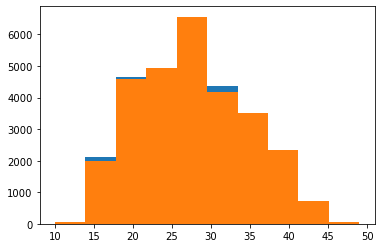

In [104]:
idade_2019 = df[df['ano_obito']=='2019']['IDADEMAE']
idade_2020 = df[df['ano_obito']=='2020']['IDADEMAE']
 
# plotting first histogram
plt.hist(idade_2019)
 
# plotting second histogram
plt.hist(idade_2020)
 
# Showing the plot using plt.show()
plt.show()

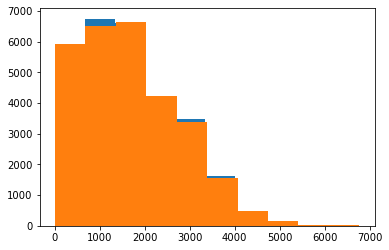

In [105]:
peso_2019 = df[df['ano_obito']=='2019']['PESO']
peso_2020 = df[df['ano_obito']=='2020']['PESO']
 
# plotting first histogram
plt.hist(peso_2019)
 
# plotting second histogram
plt.hist(peso_2020)
 
# Showing the plot using plt.show()
plt.show()

In [136]:
# Verificar a correlação entre variáveis categóricas e a variável alvo (TIPOBITO)
# Isso pode ser feito usando tabelas de contingência ou gráficos de barras empilhadas, dependendo do número de categorias
categoricas = [
    'ocor_MUNNOMEX', 'ocor_CAPITAL', 'ocor_SIGLA_UF',
       'ocor_REGIAO', 'def_escol_mae', 'def_raca_cor', 'def_sexo',
      'def_parto', 'def_gravidez', 'def_gestacao'
]
# Por exemplo:
for i in categoricas:
    contingency_table = pd.crosstab(index=df[i], columns=df['ano_obito'], normalize='index')
    print(f'Variável: {i} \n\n{contingency_table}')

Variável: ocor_MUNNOMEX 

ano_obito          2019      2020
ocor_MUNNOMEX                    
ABAETE         0.000000  1.000000
ABAETETUBA     0.272727  0.727273
ABARE          0.500000  0.500000
ABELARDO LUZ   0.000000  1.000000
ABRE CAMPO     0.000000  1.000000
...                 ...       ...
XAPURI         0.500000  0.500000
XAXIM          0.400000  0.600000
XINGUARA       0.500000  0.500000
XIQUE-XIQUE    0.333333  0.666667
ZE DOCA        0.571429  0.428571

[2373 rows x 2 columns]
Variável: ocor_CAPITAL 

ano_obito         2019      2020
ocor_CAPITAL                    
N             0.502065  0.497935
S             0.498925  0.501075
Variável: ocor_SIGLA_UF 

ano_obito          2019      2020
ocor_SIGLA_UF                    
AC             0.501253  0.498747
AL             0.485062  0.514938
AM             0.497231  0.502769
AP             0.477778  0.522222
BA             0.492246  0.507754
CE             0.499463  0.500537
DF             0.475320  0.524680
ES             0.4

In [137]:
df.to_csv('base_tratada.csv', index=False)